In [159]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
from datetime import datetime
import numpy as np
import re
import matplotlib.dates as dates
from pandasql import sqldf

In [149]:
df = pd.read_csv('u05smevosb02_srv01_access.log.gz_csv.gz', header=None, sep=';', parse_dates = True)
df.columns = ['IP','DateTime','Method','Endpoint','Protocol','ResponceCode','Number']

In [150]:
df['DateTime'] = pd.to_datetime(df.DateTime, format = "%d/%b/%Y:%H:%M:%S %z")

In [151]:
df2 = df.loc[df["DateTime"].between("2015-02-06 00:00:00+03:00", "2015-02-06 23:59:59+03:00")]

In [152]:
df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%d-%b-%Y %H:%M'))

d:\Users\user\AppData\Local\Temp/ipykernel_15684/303516404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DateTime'] = pd.to_datetime(df["DateTime"].dt.strftime('%d-%b-%Y %H:%M'))


In [153]:
df_rps = df2.groupby(['DateTime'], as_index=False)['Endpoint'].count()
df_rps.head(10)

,DateTime,Endpoint
0,2015-02-06 15:05:00,4
1,2015-02-06 15:06:00,2
2,2015-02-06 15:07:00,16
3,2015-02-06 15:08:00,69
4,2015-02-06 15:09:00,11
5,2015-02-06 15:10:00,37
6,2015-02-06 15:11:00,81
7,2015-02-06 15:12:00,98
8,2015-02-06 15:13:00,109
9,2015-02-06 15:14:00,127


In [154]:
x = df_rps['DateTime']
y = df_rps['Endpoint']

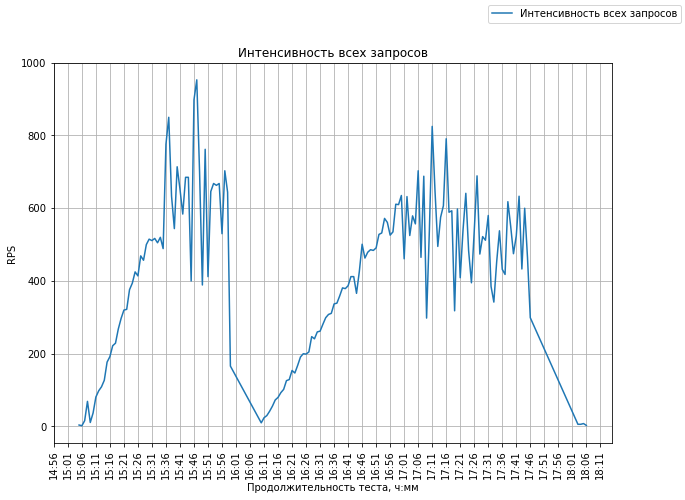

In [155]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.grid(True)
plt.xticks(rotation=90)
ax1.set_title('Интенсивность всех запросов')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('RPS')
ax1.plot(x,y,label='Интенсивность всех запросов')
fig.legend()
plt.show()

In [173]:
y = sqldf("select count(ResponceCode) from df2 where ResponceCode = 200 group by DateTime")
print(y)

     count(ResponceCode)
0                      4
1                      2
2                     16
3                     69
4                     11
..                   ...
151                  299
152                    6
153                    6
154                    8
155                    3

[156 rows x 1 columns]


In [174]:
z = sqldf("select count(ResponceCode) from df2 where ResponceCode = 500 group by DateTime")
print(z)

   count(ResponceCode)
0                   11
1                    1
2                    6
3                    1
4                    1
5                   67


ValueError: x and y must have same first dimension, but have shapes (156,) and (6, 1)

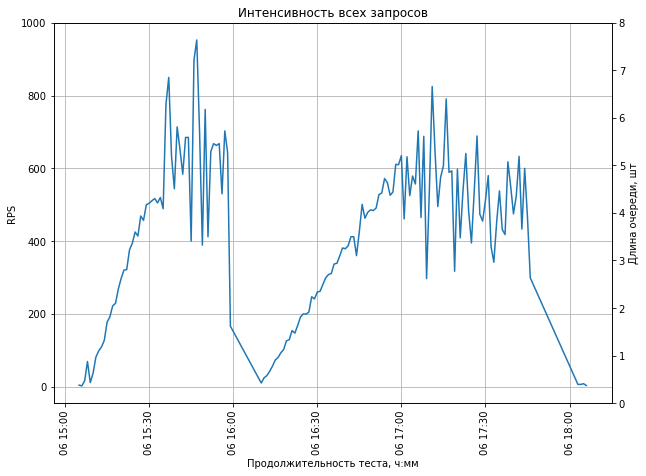